<a href="https://colab.research.google.com/github/audrb1999/Paper_review/blob/main/02.PipeDream_and_Gpipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. mini-batch와 micro - batch

2. pipedream 단점 장점, gpipe 단점 장점

3. pipeline mismatch 해결 방법

4. weight stashing이란?





## 1. mini batch와 micro batch


- 메모리의 한계로 계산이 불가능한 경우 전체 데이터를 더 작은 단위로 나누어서 학습하는 것이 미니 배치라고 합니다.

- Gpipe의 경우 가동되지 않는 상태를 줄이기 위해서 미니 배치를 더 쪼개어 마이크로 배치를 사용했습니다.


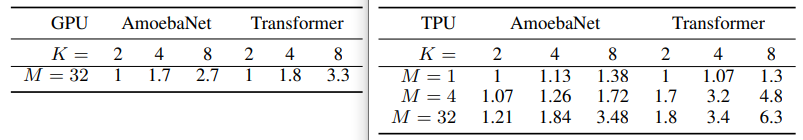

Amoebanet과 Transformer에 micro batch 수를 통해 얻은 속도 증가량

여기서 TPU가 GPU보다 더 빠른 것을 알 수 있는데 이것은 TPU가 빠른 전송속도를 제공하기 때문에 디바이스간의 데이터 전송속도가 더 빠릅니다.

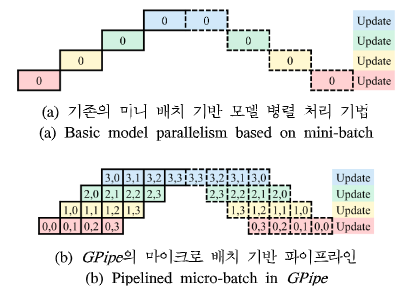

## 2. GPipe 장단점

***장점***
- mini-batch를 micro batch로 쪼개어 walker가 활성화되지 않는 상황을 줄임
- Rematerialization: 모든 중간 출력값들을 가지고 있으면 메모리에 부담이 크기 때문에 Sequential layer의 입력값만 저장하고 backward pass 과정에서 입력값을 통해 forward pass를 진행해서 기울기를 구함
  - 실제 모델에서 6.26GB 메모리를 차지하는 것을 3.46GB로 줄임


***단점***
- backward pass 과정에서 forward pass를 한번 더 진행하여 값을 25%의 시간이 더 걸리게 됨

- 정확한 모델 분할과 task 사이의 균형 없이는 속도 증진을 얻기 힘듬

- 하나의 배치를 처리한 후 각 디바이스가 파라미터를 갱신한 다음 배치가 진행되기 때문에 마이크로 배치를 사용함에도 여전히 디바이스가 가동되지 않는 시간이 존재.

## 3. PipeDream 장단점

***장점***

- 여러 개의 배치를 중첩시켜서 walker가 가동되지 않는 상태를 줄임

- 미니 배치에 대한 forward pass 또는 backward pass 단계가 완료되면 activation value나 gradient를 다음 단계로 비동기적으로 전송하여 다른 미니 배치를 처리
  - Gradient와 output activation의 subset만 통신하면 되므로 데이터 병렬 처리보다 더 적게 통신함

***단점***

- weight stashing을 통해 전체 배치 관점에서 끝난 배치의 파라미터를 사용하는 것이 아니라 최신 버전을 사용하게 했지만 그럼에도 staleness 문제가 발생


- 단점에 대해서 한번 더 알아보기

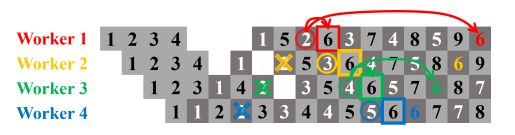

워커 간의 동일하지 않은 가중치 사용으로 인한 문제에 대해서 찾아보기

- weight stashing

forward pass 때 사용한 최신 버전의 weight를 사용하고 이 weight를 저장한 다음 동일한 미니 배치에 대한 backward pass를 진행할 때 해당 weight를 사용하는 방법

- mismatch

forward pass 때 사용한 weight와 backward pass 때 사용한 weight가 다르다.

우선 Deepspeed 먼저 알아보기

- 어떤 환경에 적합하게 만들어졌는지
